# LinearRegression

In [2]:
import numpy as np

perch_length = np.array(
    [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
     )
perch_weight = np.array(
    [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
)

In [3]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [4]:
# k-최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input, train_target) # 훈련

KNeighborsRegressor(n_neighbors=3)

In [5]:
# 특정 범위 밖의 예측이 안되는 문제 -> KNeighborsRegressor
print(knr.predict([[15]]))
print(knr.predict([[14]]))
print(knr.predict([[13]]))
print(knr.predict([[25]]))
# -> 1033.33333333

[13.96666667]
[13.96666667]
[10.66666667]
[290.66666667]


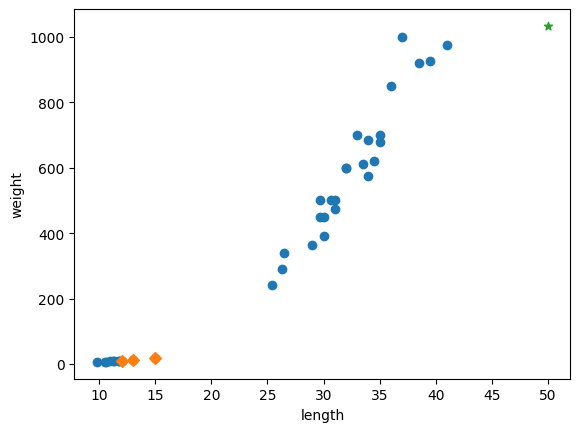

In [6]:
distances, indexes = knr.kneighbors([[15]])

import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

# 예측에 사용된 이웃 & 예측된 값
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
plt.scatter(50, 1033.33333333, marker='*')
plt.show()

# 선형회귀

In [7]:
# 대안 - 위 문제를 해결 하기 위한 선형회귀 모듈 사용
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [8]:
lr.fit(train_input, train_target)

LinearRegression()

In [9]:
lr.predict([[15]])

array([79.63461145])

In [10]:
print(lr.predict([[25]]))

[382.50197381]


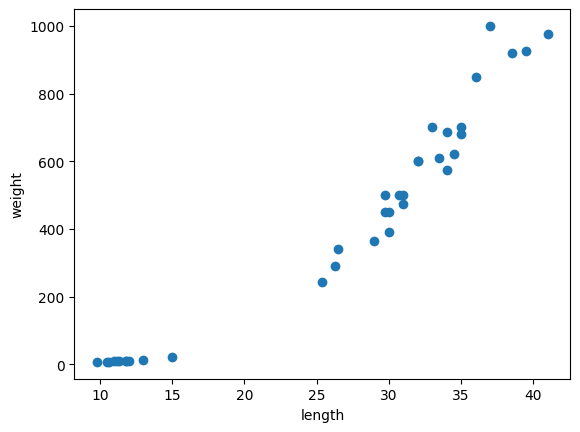

In [14]:
A = lr.coef_ # 계수
B = lr.intercept_ # 절편, 독립항

plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [12]:
A

array([30.28673624])

In [13]:
B

np.float64(-374.66643208962915)

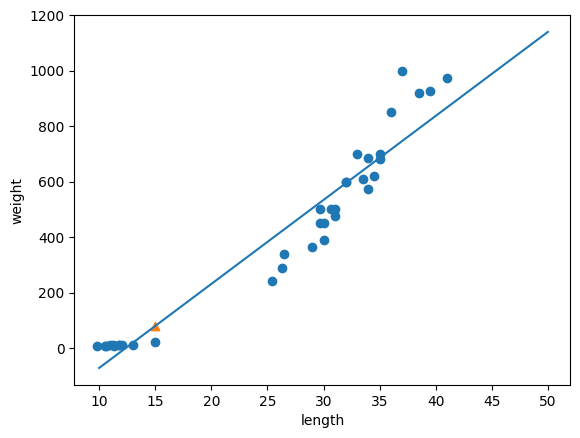

In [15]:
plt.scatter(train_input, train_target)
plt.plot([10, 50], [10 * A + B, 50 * A + B])
plt.scatter(15, 79, marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

In [16]:
print(lr.predict([[15]]))

[79.63461145]


In [17]:
train_poly = np.column_stack((train_input ** 2, train_input))

In [18]:
lr = LinearRegression()
lr.fit(train_poly, train_target)

LinearRegression()

In [19]:
print(lr.predict([[15**2, 15]]))

[37.7166096]


In [20]:
train_poly = np.column_stack((train_input ** 2, train_input))
lr = LinearRegression()
lr.fit(train_poly, train_target)


LinearRegression()

In [21]:
lr.predict([[15 ** 2, 15]])

array([37.7166096])

In [22]:
train_poly

array([[ 900.  ,   30.  ],
       [ 841.  ,   29.  ],
       [ 882.09,   29.7 ],
       [ 127.69,   11.3 ],
       [ 139.24,   11.8 ],
       [ 169.  ,   13.  ],
       [1024.  ,   32.  ],
       [ 942.49,   30.7 ],
       [1089.  ,   33.  ],
       [1225.  ,   35.  ],
       [1681.  ,   41.  ],
       [1482.25,   38.5 ],
       [ 645.16,   25.4 ],
       [ 144.  ,   12.  ],
       [1560.25,   39.5 ],
       [ 882.09,   29.7 ],
       [1369.  ,   37.  ],
       [ 961.  ,   31.  ],
       [ 110.25,   10.5 ],
       [ 691.69,   26.3 ],
       [1156.  ,   34.  ],
       [ 702.25,   26.5 ],
       [ 112.36,   10.6 ],
       [  96.04,    9.8 ],
       [1225.  ,   35.  ],
       [ 125.44,   11.2 ],
       [ 961.  ,   31.  ],
       [1190.25,   34.5 ],
       [1122.25,   33.5 ],
       [ 225.  ,   15.  ],
       [1156.  ,   34.  ],
       [ 900.  ,   30.  ],
       [ 139.24,   11.8 ],
       [1024.  ,   32.  ],
       [1296.  ,   36.  ],
       [ 121.  ,   11.  ]])

In [23]:
print(lr.coef_, lr.intercept_)

[  1.04741697 -18.86166401] 84.97275077767159


In [24]:
lr.coef_[0]

np.float64(1.0474169733189018)

In [25]:
lr.coef_[1]

np.float64(-18.861664011760514)

In [26]:
C = lr.intercept_
C

np.float64(84.97275077767159)

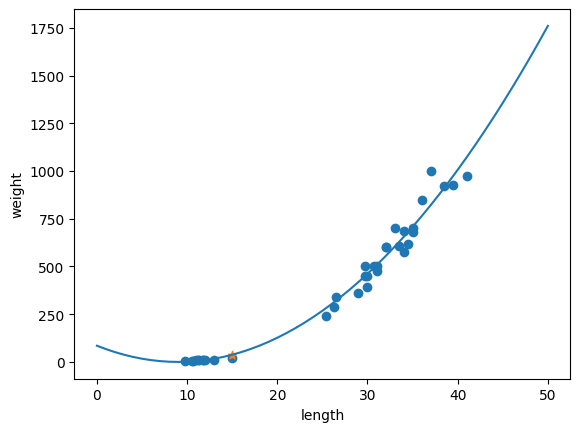

In [27]:
A = lr.coef_[0]
B = lr.coef_[1]
C = lr.intercept_

points = np.arange(0, 51)
plt.scatter(train_input, train_target)
plt.xlabel('length')
plt.ylabel('weight')
# plt.plot(points, A * points**2 + B * points + C)
plt.plot(points, (A * points**2) + (B * points) + C)
# plt.scatter([50], [1574], marker='^')
plt.scatter([15], [37.7], marker='*')
# plt.plot(points, 1.01 * points**2 - 21.6 * points +  116.05)
# plt.plot(points, 1.01*points**2 - 21.6*points + 116.05)
plt.show()

In [29]:
print(lr.predict([[15**2, 15]]))

[37.7166096]


In [30]:

print(lr.predict([[32**2, 32]]))

[553.95448308]


In [31]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)

In [32]:
with open("model.pkl", "rb") as f:
    fish_model = pickle.load(f)

In [33]:
print(fish_model.predict([[32**2, 32]]))

[553.95448308]
